# Neste notebook estarei buscando responder:

Qual esfera (federal, estadual, municipal) mais contrata projetos?

Existe diferença no valor médio dos contratos por esfera?

Qual foi o cliente que mais contratou por esfera?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
sns.set(style = 'whitegrid')

In [3]:
ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = ';',
    decimal = ',',
    encoding = 'latin1'
)


In [4]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

In [ ]:
# df.shape

In [5]:
contratos_por_esfera = df['esfera_cliente'].value_counts()

# print(contratos_por_esfera)

### Qual esfera (federal, estadual, municipal) mais contrata projetos?

Aqui estamos analisando a quantidade de **contratos realizados** por cada esfera do cliente.

O gráfico a seguir exibe o número de contratos por **esfera de cliente**.


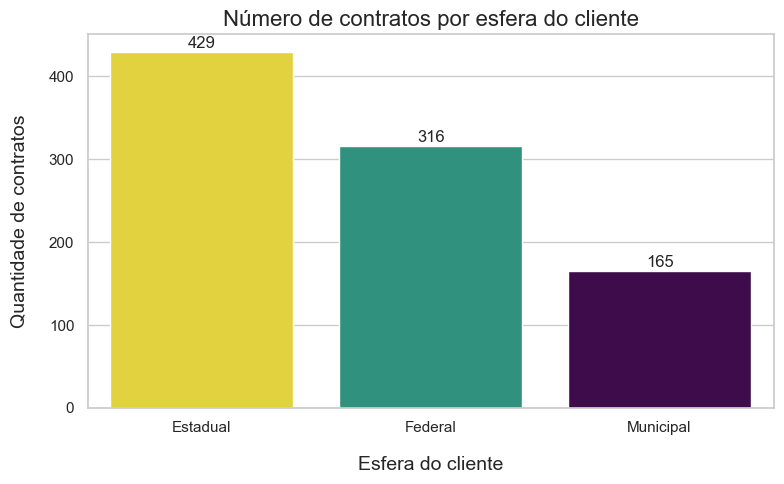

In [8]:
plt.figure(figsize=(8,5))
grafico = sns.barplot(x = contratos_por_esfera.index, y = contratos_por_esfera.values, palette = 'viridis', hue = contratos_por_esfera, legend = False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='%.0f', padding=0.8)

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_height():,.0f}', 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(0, 5), textcoords = 'offset points')

plt.title('Número de contratos por esfera do cliente', fontsize = 16)
plt.xlabel('Esfera do cliente', labelpad = 15, fontsize = 14)
plt.ylabel('Quantidade de contratos', labelpad = 15, fontsize = 14)
plt.tight_layout() 
plt.show()

In [12]:
valor_medio_por_esfera = df.groupby("esfera_cliente")["valor_global_contrato_reais"].mean().sort_values(ascending=False)

# print(valor_medio_por_esfera)

### Existe diferença no valor médio dos contratos por esfera?

Aqui estamos analisando o **valor médio** dos contratos realizados por cada esfera de cliente.

O gráfico a seguir exibe o valor médio dos contratos por **esfera de cliente**.


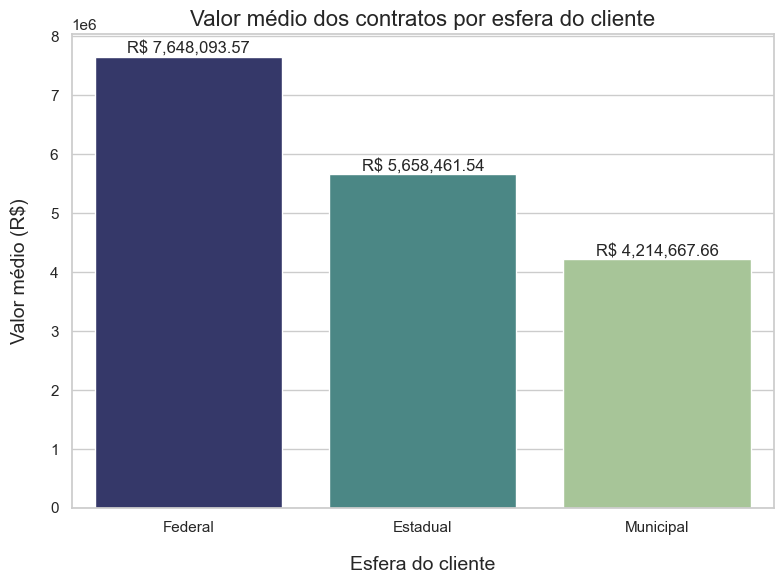

In [11]:
plt.figure(figsize=(8,6))
grafico = sns.barplot(x = valor_medio_por_esfera.index, y = valor_medio_por_esfera.values, hue = valor_medio_por_esfera, palette = 'crest', legend = False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R$ {:,.2f}', padding=0.8)

# for p in grafico.patches:
#     grafico.annotate(f'{p.get_height():,.2f}', 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      fontsize = 10, color = 'black', 
#                      xytext=(0, 5), textcoords = 'offset points')

plt.title('Valor médio dos contratos por esfera do cliente', fontsize=16)
plt.xlabel('Esfera do cliente', labelpad = 15, fontsize = 14)
plt.ylabel('Valor médio (R$)', labelpad = 15, fontsize = 14)
plt.tight_layout() 
plt.show()

### Qual foi o cliente que mais contratou por esfera?

Aqui estamos analisando a **moda** da coluna **cliente** por cada esfera de cliente.

O gráfico a seguir exibe o a moda dos clientes por **esfera de cliente**.

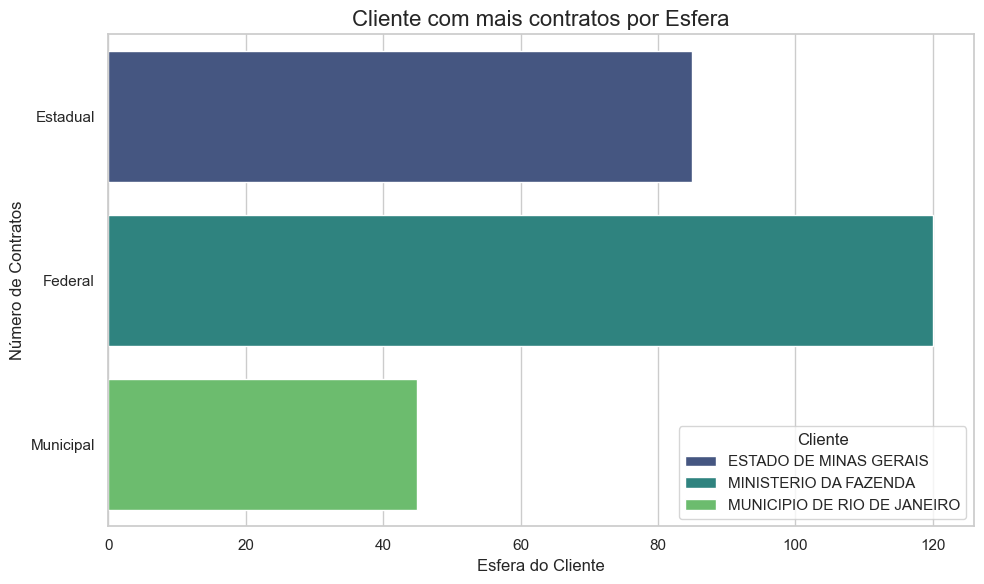

In [52]:
contratos_por_esfera = df.groupby(['esfera_cliente', 'cliente']).size().reset_index(name='qtd_contratos')

top_clientes_por_esfera = contratos_por_esfera.loc[contratos_por_esfera.groupby('esfera_cliente')['qtd_contratos'].idxmax()]

plt.figure(figsize=(10,6))
sns.barplot(data=top_clientes_por_esfera, 
            y='esfera_cliente', 
            x='qtd_contratos', 
            hue='cliente', 
            palette='viridis',
            orient='h')

for container in grafico.containers:
    grafico.bar_label(container, fmt='%d', padding=0.8)

# Não sei o motivo de não mostrar os rótulos

plt.title('Cliente com mais contratos por Esfera', fontsize=16)
plt.xlabel('Esfera do Cliente', fontsize=12)
plt.ylabel('Número de Contratos', fontsize=12)
plt.legend(title='Cliente')
plt.tight_layout()
plt.show()